In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as etree
from datetime import datetime
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import UnivariateSpline


# EDA

In [11]:
# read data
df = pd.read_csv('Data_allfactors_khzl3.csv').drop('Unnamed: 0', axis=1)
# calculate target return
df['rtn_4_to_6'] = (df['half_year_return'] + 1) / (df['three_m_rtn'] + 1) - 1
print(df.shape)
print(df.columns)
df.head()

(1474, 31)
Index(['Period Ending', 'close', 'Current Ratio', 'Quick Ratio',
       'Profit Margin', 'After Tax ROE', 'size', 'non linear size',
       'book to price', 'EY-CETOP', 'EY-ETOP', 'Leverage-MLEV',
       'Leverage-DTOA', 'Leverage-BLEV', 'momentum', 'Liq-STOM', 'Liq-STOQ',
       'Liq-STOH', 'GICS Sector', 'beta', 'weighted alpha', 'std_res',
       'half_year_return', 'three_m_rtn', 'VaR_4_to_6', 'std_4_to_6',
       'VaR_1_to_3', 'std_1_to_3', 'rtn_relative_1_to_3',
       'rtn_relative_4_to_6', 'rtn_4_to_6'],
      dtype='object')


,Period Ending,close,Current Ratio,Quick Ratio,Profit Margin,After Tax ROE,size,non linear size,book to price,EY-CETOP,...,std_res,half_year_return,three_m_rtn,VaR_4_to_6,std_4_to_6,VaR_1_to_3,std_1_to_3,rtn_relative_1_to_3,rtn_relative_4_to_6,rtn_4_to_6
0,12/31/2012,13.500000,78.0,72.0,8,23,22.232331,155.393912,-0.305362,-0.414815,...,0.028314,0.217037,0.150370,-0.030637,0.018798,-0.040586,0.025958,0.060971,0.019084,0.057952
1,12/31/2013,25.250000,104.0,96.0,7,67,22.138223,179.991188,-0.663458,-0.445545,...,0.022369,0.661386,0.493465,-0.033577,0.020638,-0.023728,0.021264,0.470450,0.068162,0.112437
2,12/31/2014,53.630001,88.0,80.0,7,143,24.372577,-75.276829,0.052564,0.074958,...,0.023906,-0.272236,-0.082976,-0.040678,0.023540,-0.043859,0.025246,-0.086891,-0.211136,-0.206385
3,12/31/2015,42.349998,73.0,67.0,19,135,24.065962,-81.963076,0.199150,0.268949,...,0.018811,-0.307438,-0.070366,-0.045276,0.026333,-0.038987,0.021639,-0.081222,-0.272837,-0.255016
4,12/28/2012,71.510002,124.0,34.0,6,32,22.379684,119.254540,0.231026,0.073976,...,0.018394,0.145154,0.158300,-0.020146,0.012206,-0.015416,0.012249,0.038636,-0.039822,-0.011349


## Plot by sector

### get top 5 sectors

In [12]:
# get top five sectors
ranked_size = df.groupby('GICS Sector')[['size']].sum().sort_values(by='size')
top_5 = ranked_size.index[-5:]
display(ranked_size)

,size
GICS Sector,
Telecommunications Services,480.767610
Materials,1989.980532
Utilities,2069.770591
Consumer Staples,2227.491225
Real Estate,2316.155356
Energy,2585.391485
Health Care,3793.917069
Financials,4204.197921
Information Technology,4551.935400


### plots

In [24]:
def plot_by_sector(target, xlim_range=(0.005, 0.025), alpha_level=0.9, n_b=10):
    """return dist plots of target by sector"""
    plt.rcParams.update({'font.size': 14})    # set font size
    plt.figure(figsize=(10,7))    # set figure size
    for sec in df['GICS Sector'].unique():
        p, x = np.histogram(df[df['GICS Sector'] == sec][target], density=True, bins=n_b)    # get dist line
        x = x[:-1] + (x[1] - x[0])/2    # center dist line
        # smooth dist line
        f = UnivariateSpline(x, p, s=40)
        y = f(x)
        spl = make_interp_spline(x, y, k=3) 
        xnew = np.linspace(x.min(), x.max(), 300)
        ynew = spl(xnew)
        plt.plot(xnew, ynew, alpha=alpha_level)    # plot dist line
    # set legend, x, y labels, tick size, title, gird, save img and stuff
    plt.legend(df['GICS Sector'].unique())
    plt.ylabel('count', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(xlim_range[0], xlim_range[1])
    if 'std' in target:
        name = 'SD'
    else:
        name = 'Return'
    plt.title(f'Dist of {name} in each industry')
    plt.xlabel(f'{name}', fontsize=18)
    plt.grid(alpha=0.5)
    plt.savefig(f'Dist of {name} in each industry.png',dpi=300)
    plt.show()

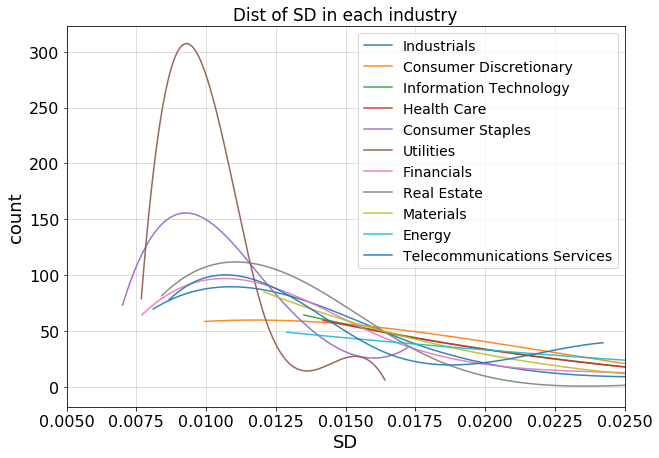

In [25]:
# std plot
plot_by_sector('std_4_to_6', alpha_level=0.9, n_b=5)

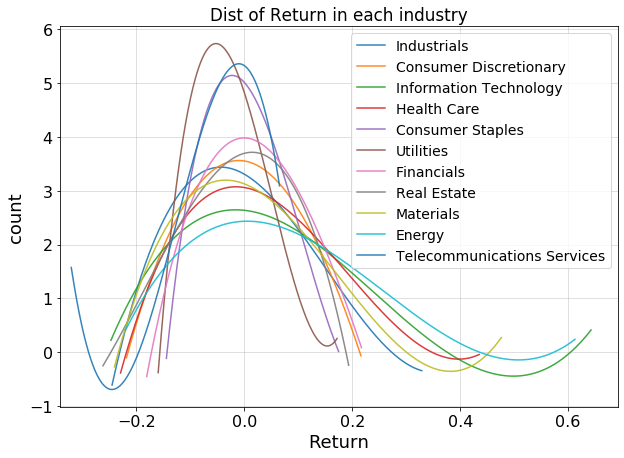

In [26]:
# rtn plot
plot_by_sector('rtn_relative_4_to_6', xlim_range=(min(df['rtn_relative_4_to_6']), max(df['rtn_relative_4_to_6'])))

In [28]:
import seaborn as sns

Text(0, 0.5, 'Month 4-6 Relative Return Rate')

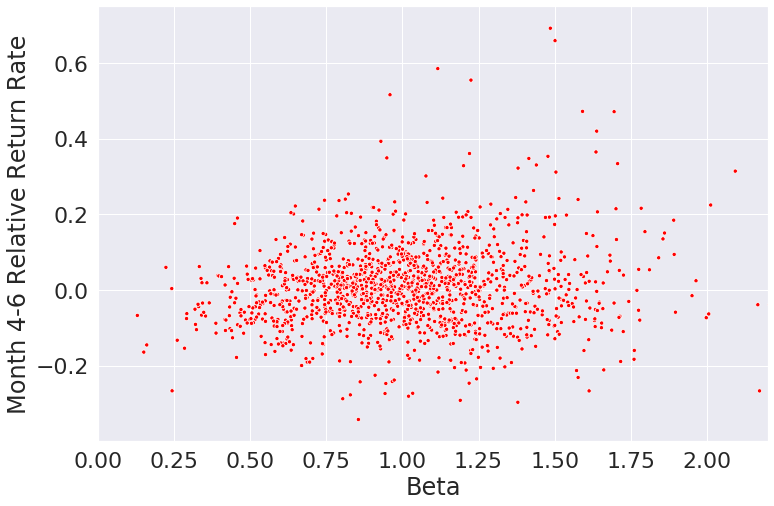

In [83]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=2)
ax = sns.scatterplot(y="rtn_relative_4_to_6", x="beta", data=df, size=0.1, legend=False, color='red')
# plt.ylim(0, 0.05)
plt.xlim(0, 2.2)
# Set x-axis label
plt.xlabel('Beta')
# Set y-axis label
plt.ylabel('Month 4-6 Relative Return Rate')

Text(0, 0.5, 'Month 4-6 Relative Return Rate')

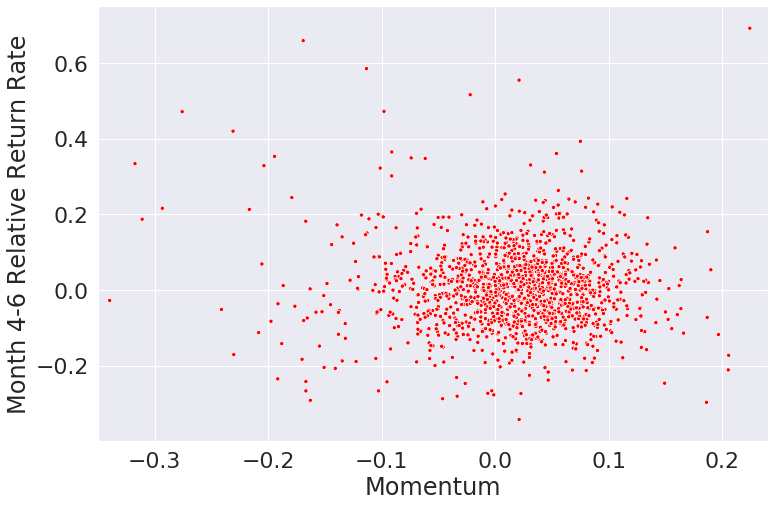

In [84]:
ax = sns.scatterplot(y="rtn_relative_4_to_6", x="momentum", data=df, size=0.1, legend=False, color='red')
# plt.ylim(0, 0.05)
plt.xlim(-0.35, 0.24)
# Set x-axis label
plt.xlabel('Momentum')
# Set y-axis label
plt.ylabel('Month 4-6 Relative Return Rate')

Text(0, 0.5, 'Return Rate Std')

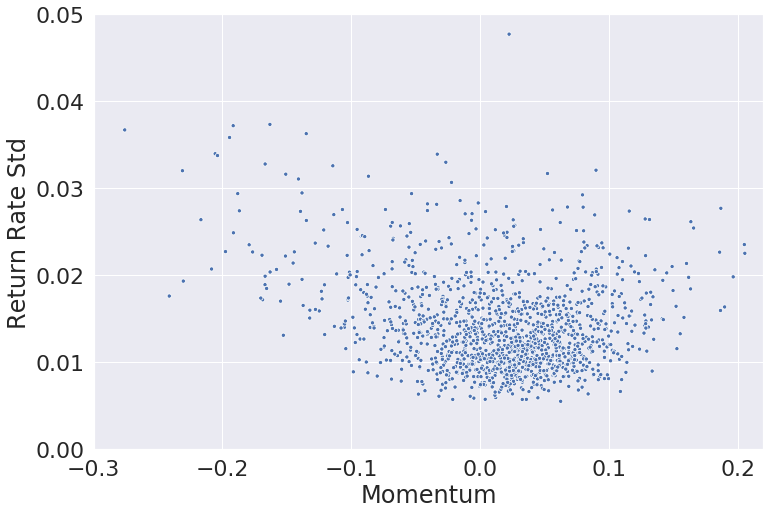

In [85]:
ax = sns.scatterplot(y="std_4_to_6", x="momentum", data=df, size=0.1, legend=False)
plt.ylim(0, 0.05)
plt.xlim(-0.3, 0.22)
# Set x-axis label
plt.xlabel('Momentum')
# Set y-axis label
plt.ylabel('Return Rate Std')

Text(0, 0.5, 'Return Rate Std')

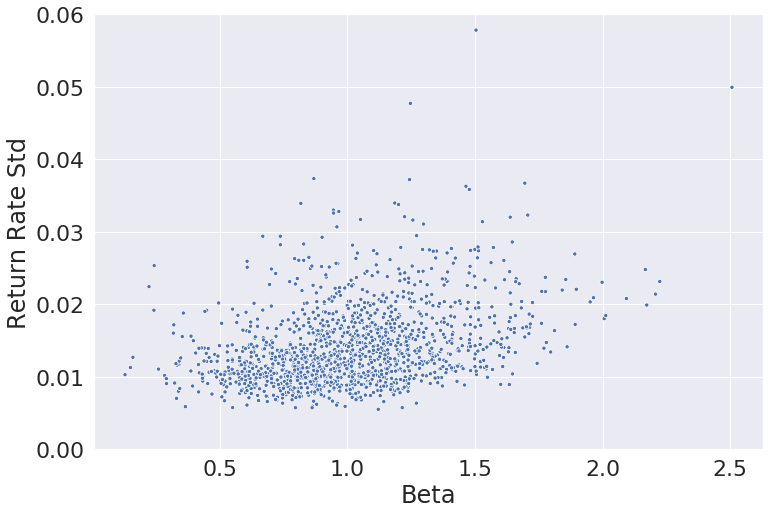

In [86]:
ax = sns.scatterplot(y="std_4_to_6", x="beta", data=df, size=0.1, legend=False)
plt.ylim(0, 0.06)
# plt.xlim(-0.3, 2.2)
# Set x-axis label
plt.xlabel('Beta')
# Set y-axis label
plt.ylabel('Return Rate Std')

In [56]:
df.columns

Index(['Period Ending', 'close', 'Current Ratio', 'Quick Ratio',
       'Profit Margin', 'After Tax ROE', 'size', 'non linear size',
       'book to price', 'EY-CETOP', 'EY-ETOP', 'Leverage-MLEV',
       'Leverage-DTOA', 'Leverage-BLEV', 'momentum', 'Liq-STOM', 'Liq-STOQ',
       'Liq-STOH', 'GICS Sector', 'beta', 'weighted alpha', 'std_res',
       'half_year_return', 'three_m_rtn', 'VaR_4_to_6', 'std_4_to_6',
       'VaR_1_to_3', 'std_1_to_3', 'rtn_relative_1_to_3',
       'rtn_relative_4_to_6', 'rtn_4_to_6'],
      dtype='object')

In [57]:
full_df_temp_1 = df[['rtn_relative_4_to_6', 'Current Ratio', 'Quick Ratio',
       'Profit Margin', 'After Tax ROE', 'size', 'non linear size',
       'book to price', 'EY-CETOP', 'EY-ETOP', 'Leverage-MLEV',
       'Leverage-DTOA', 'Leverage-BLEV', 'momentum', 'Liq-STOM', 'Liq-STOQ',
       'Liq-STOH','beta', 'weighted alpha', 'std_res']]

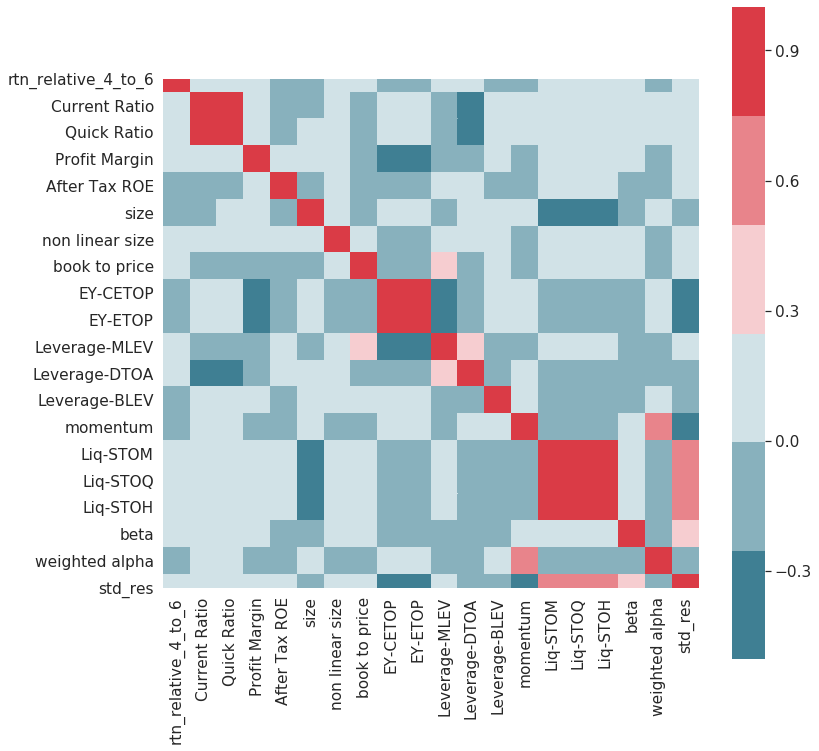

In [89]:
corr = full_df_temp_1.corr()
sns.set(rc={'figure.figsize':(12,12)},font_scale=1.4)
corr_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10),
            square=True)

In [59]:
full_df_temp_2 = df[['std_4_to_6', 'Current Ratio', 'Quick Ratio',
       'Profit Margin', 'After Tax ROE', 'size', 'non linear size',
       'book to price', 'EY-CETOP', 'EY-ETOP', 'Leverage-MLEV',
       'Leverage-DTOA', 'Leverage-BLEV', 'momentum', 'Liq-STOM', 'Liq-STOQ',
       'Liq-STOH','beta', 'weighted alpha', 'std_res']]

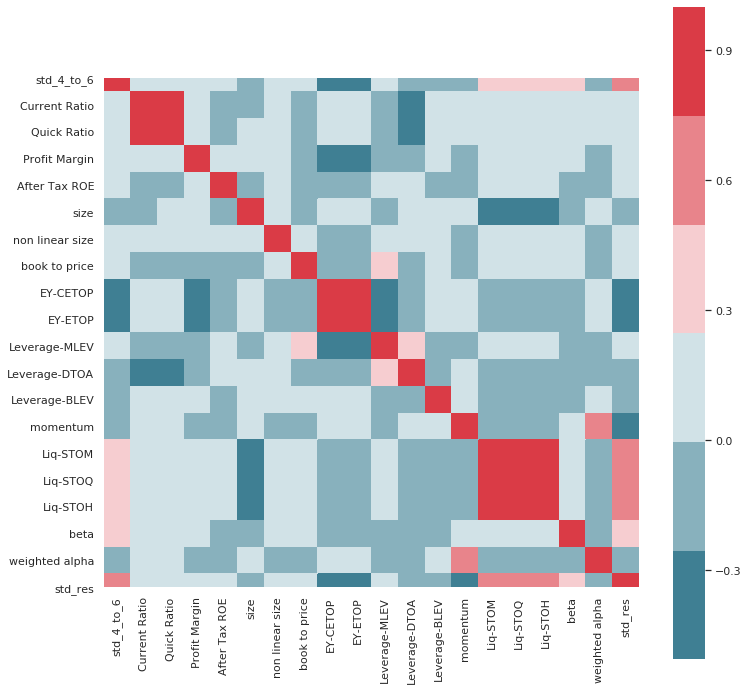

In [78]:
corr = full_df_temp_2.corr()
sns.set(rc={'figure.figsize':(12,12)})
corr_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10),
            square=True)